<a href="https://colab.research.google.com/github/YuvinNavod/Python-Machine-Learning-Projects/blob/main/13_Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13. Customer Segmentation using K-Means Clustering


dataset =https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

### import dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


**Data collecetion and analysis**

In [4]:
#import dataset as pandas dataset
customer_data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine learning projects/13. Customer Segmentation using K-Means Clustering/Mall_Customers.csv')

In [5]:
#first five rows
customer_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#finding number of rows and columns
customer_data.shape

(200, 5)

In [7]:
#get simple information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#check nullvalues
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**choseing anual income column and spending score **

In [9]:
X=customer_data.iloc[:,[3,4]].values
print (X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### choosing number of clusters

WCSS--> within clusters sumof squares

In [10]:
#finding wcss value for differnt number of clusters
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

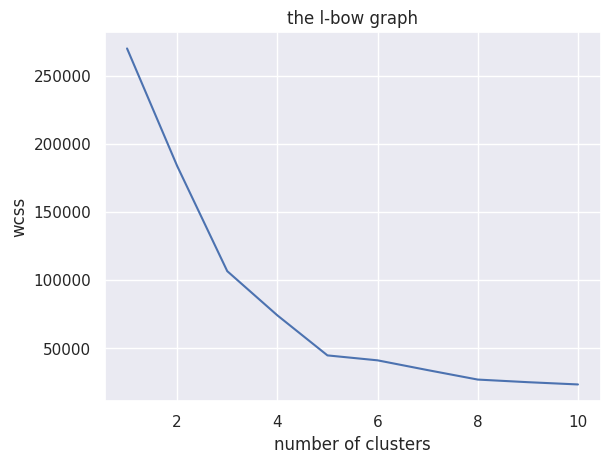

In [11]:
#plot l-bow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('the l-bow graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

optimum  number of cluster is 5

### Traing kmenas clustering model

In [13]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

#return a label for each data point based on their cluster
Y=kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


### visualizing all the cluster

Text(0, 0.5, 'spending score')

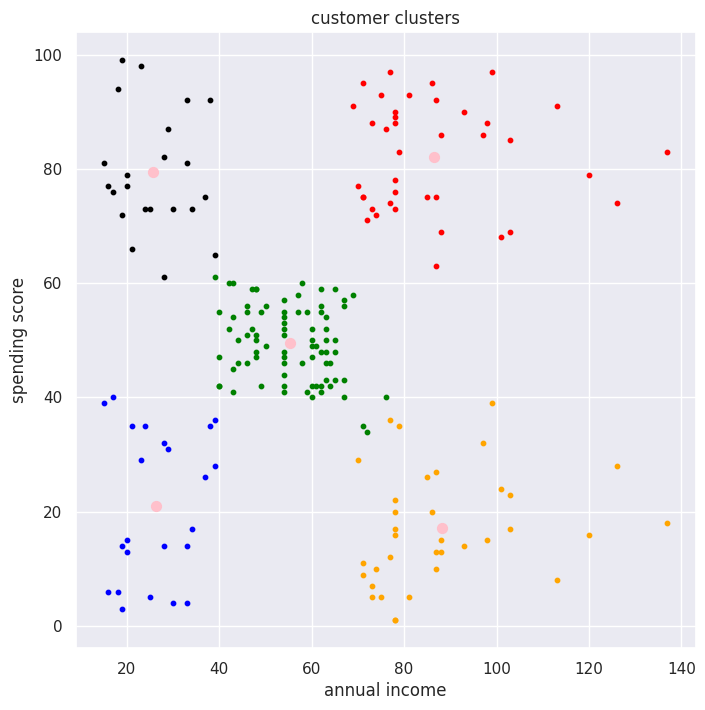

In [20]:
#ploting all the ccluster wiith sentrolid
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=10,c='green',label='cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=10,c='red',label='cluster2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=10,c='orange',label='cluster3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=10,c='blue',label='cluster4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=10,c='black',label='cluster5')

#plot the centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='pink',label='centroid')

plt.title('customer clusters')
plt.xlabel('annual income')
plt.ylabel('spending score')